## **Data Exploration & Visualization**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   5 non-null      int64  
 1   Oil_Production_Rate    5 non-null      float64
 2   Gas_Production_Rate    5 non-null      float64
 3   Water_Production_Rate  5 non-null      float64
 4   Reservoir_Pressure     5 non-null      float64
 5   Water_Cut              5 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 372.0 bytes
None
           Days  Oil_Production_Rate  Gas_Production_Rate  \
count  5.000000             5.000000             5.000000   
mean   2.000000          5014.959740         10028.728087   
std    1.581139            35.690957            89.868616   
min    0.000000          4972.317904          9905.351277   
25%    1.000000          4989.088385          9985.983024   
50%    2.000000          5024.390823         10029.902225 

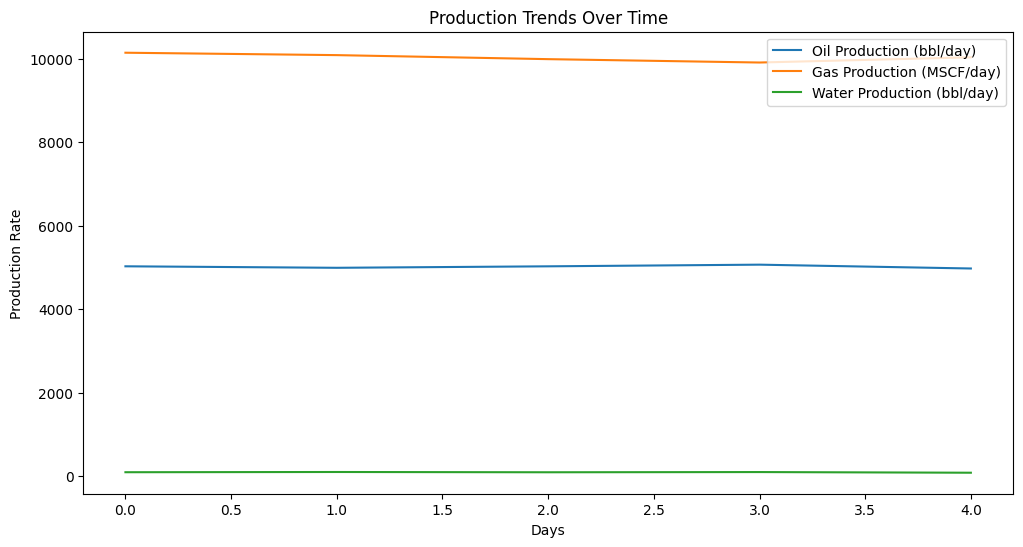

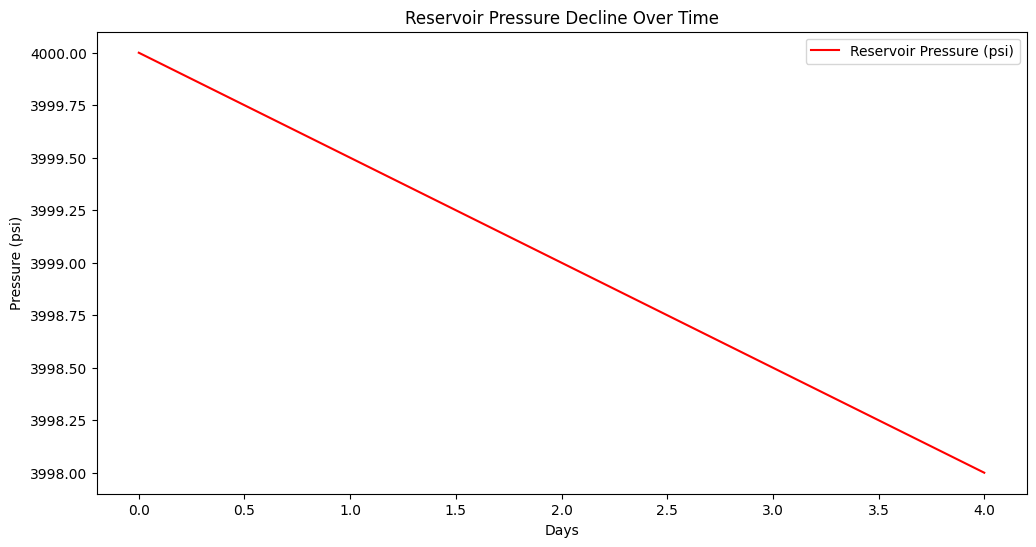

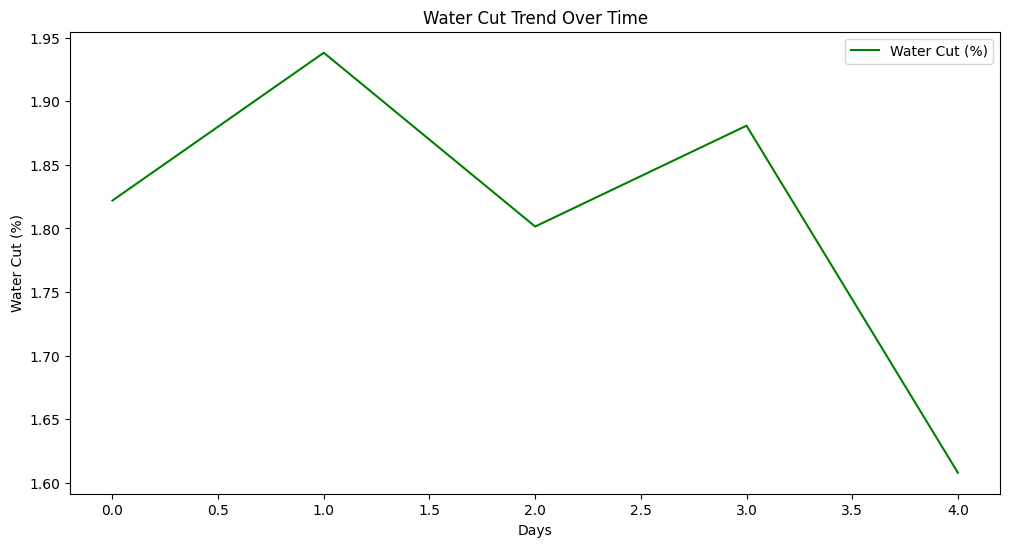

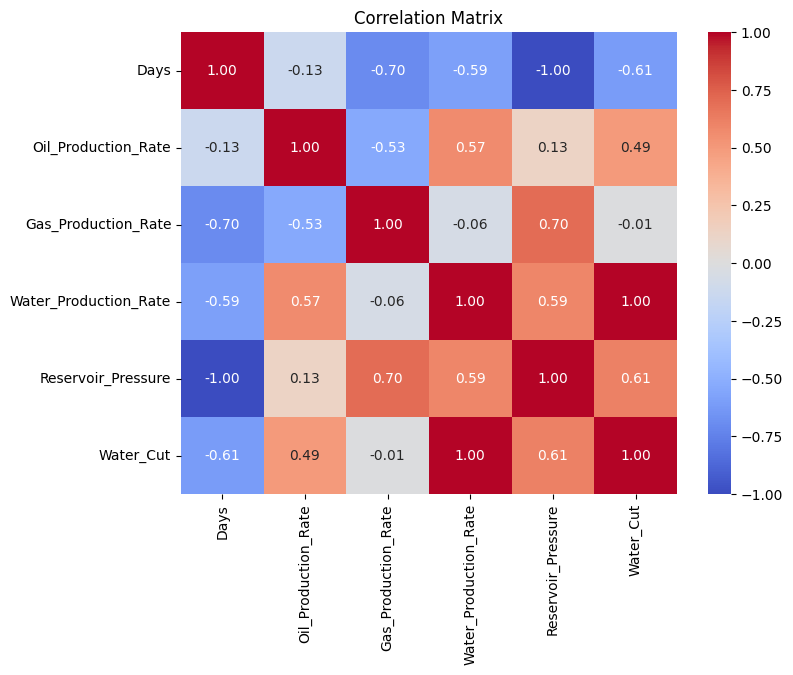

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/EnvyNerd/Project-File/refs/heads/main/Cell%20output%202.csv")  # Replace with your actual file name

# Check basic info
print(df.info())
print(df.describe())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Time-Series Plots
plt.figure(figsize=(12, 6))
plt.plot(df["Days"], df["Oil_Production_Rate"], label="Oil Production (bbl/day)")
plt.plot(df["Days"], df["Gas_Production_Rate"], label="Gas Production (MSCF/day)")
plt.plot(df["Days"], df["Water_Production_Rate"], label="Water Production (bbl/day)")
plt.xlabel("Days")
plt.ylabel("Production Rate")
plt.title("Production Trends Over Time")
plt.legend()
plt.show()

# Reservoir Pressure Decline
plt.figure(figsize=(12, 6))
plt.plot(df["Days"], df["Reservoir_Pressure"], color="red", label="Reservoir Pressure (psi)")
plt.xlabel("Days")
plt.ylabel("Pressure (psi)")
plt.title("Reservoir Pressure Decline Over Time")
plt.legend()
plt.show()

# Water Cut Trend
plt.figure(figsize=(12, 6))
plt.plot(df["Days"], df["Water_Cut"], color="green", label="Water Cut (%)")
plt.xlabel("Days")
plt.ylabel("Water Cut (%)")
plt.title("Water Cut Trend Over Time")
plt.legend()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## **Feature Selection & Data Preprocessing**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features (X) and target variable (y)
X = df[["Days", "Gas_Production_Rate", "Water_Production_Rate", "Reservoir_Pressure", "Water_Cut"]]
y = df["Oil_Production_Rate"]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Normalize features (optional, useful for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing complete!")


Data preprocessing complete!


In [12]:
print(y_test.dtype)  # Should be float or int
print(y_pred.dtype)  # Should be float or int
print(df.isnull().sum())  # Check for missing values


float64
float64
Days                     0
Oil_Production_Rate      0
Gas_Production_Rate      0
Water_Production_Rate    0
Reservoir_Pressure       0
Water_Cut                0
dtype: int64


In [13]:
y_test = y_test.astype(float)
y_pred = y_pred.astype(float)


In [14]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 3 samples
Test set size: 2 samples


## **Train a Regression Model**

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Manually taking the square root
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
MAE: 55.53
RMSE: 56.60
R² Score: -44.5630


## **Visualizing Predictions vs. Actual Data**

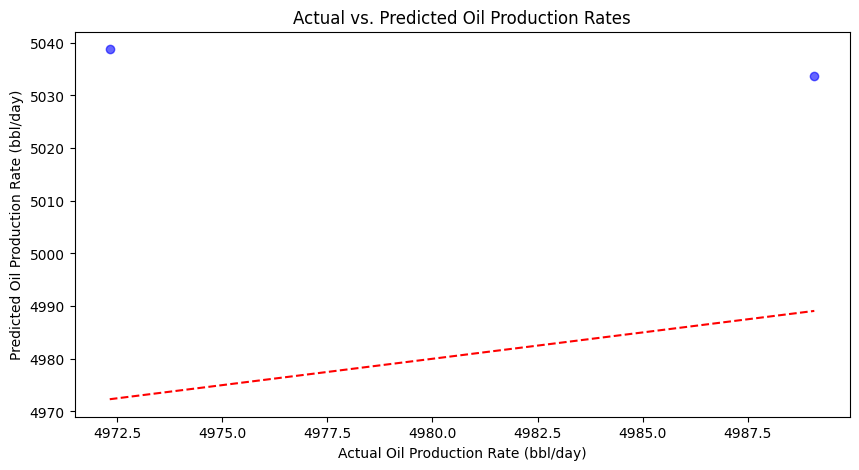

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Actual Oil Production Rate (bbl/day)")
plt.ylabel("Predicted Oil Production Rate (bbl/day)")
plt.title("Actual vs. Predicted Oil Production Rates")
plt.show()


## **Hyperparameter Tuning for Random Forest**

In [22]:
import numpy as np

print("NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaN values in y_train:", np.isnan(y_train).sum())
print("Infinite values in X_train_scaled:", np.isinf(X_train_scaled).sum())
print("Infinite values in y_train:", np.isinf(y_train).sum())


NaN values in X_train_scaled: 0
NaN values in y_train: 0
Infinite values in X_train_scaled: 0
Infinite values in y_train: 0


In [27]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize model
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0]
}

# Perform Randomized Search
xgb_random = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=10, cv=2, random_state=42, n_jobs=-1)
xgb_random.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", xgb_random.best_params_)


Best Parameters: {'subsample': 0.6, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.2}


In [26]:
print(f"Training set size: {X_train.shape[0]}")


Training set size: 3


## **Train Model with Best Parameters**

In [28]:
# Train with best hyperparameters
best_xgb = XGBRegressor(**xgb_random.best_params_, objective="reg:squarederror", random_state=42)
best_xgb.fit(X_train_scaled, y_train)

# Predict & Evaluate
y_pred_xgb = best_xgb.predict(X_test_scaled)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"Optimized XGBoost R² Score: {r2_xgb:.4f}")


Optimized XGBoost R² Score: -63.7972


## **Predict Future Production**

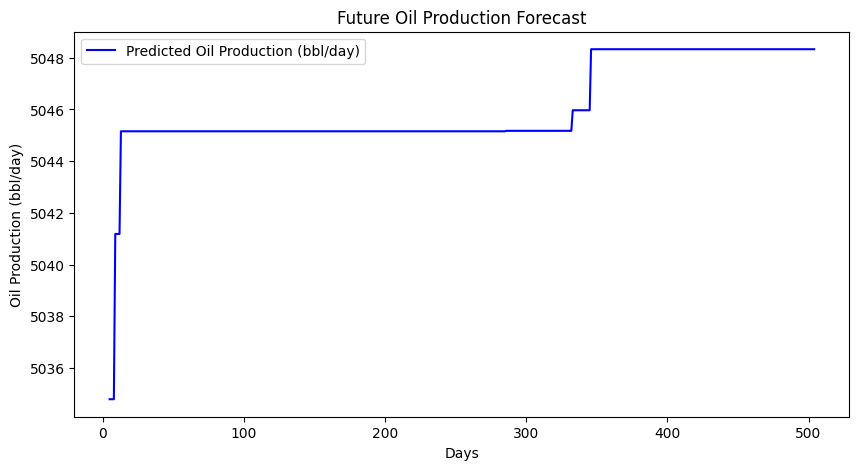

In [29]:
import numpy as np

# Generate future days (next 500 days)
future_days = np.arange(df["Days"].max() + 1, df["Days"].max() + 501, 1)

# Assume linear reservoir pressure decline & water cut trends
future_pressure = df["Reservoir_Pressure"].iloc[-1] - 0.5 * np.arange(1, 501)
future_water_cut = df["Water_Cut"].iloc[-1] + 0.05 * np.arange(1, 501)

# Generate future feature set
future_data = pd.DataFrame({
    "Days": future_days,
    "Gas_Production_Rate": df["Gas_Production_Rate"].iloc[-1] * np.exp(-0.001 * np.arange(1, 501)),
    "Water_Production_Rate": df["Water_Production_Rate"].iloc[-1] * (1 + 0.0005 * np.arange(1, 501)),
    "Reservoir_Pressure": future_pressure,
    "Water_Cut": future_water_cut
})

# Scale the features
future_data_scaled = scaler.transform(future_data)

# Predict future production
future_oil_prediction = best_rf.predict(future_data_scaled)

# Plot future production
plt.figure(figsize=(10, 5))
plt.plot(future_days, future_oil_prediction, label="Predicted Oil Production (bbl/day)", color='blue')
plt.xlabel("Days")
plt.ylabel("Oil Production (bbl/day)")
plt.title("Future Oil Production Forecast")
plt.legend()
plt.show()


## **Evaluate the XGBoost Model**

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred_xgb = best_xgb.predict(X_test_scaled)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print(f"Model Performance:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
MAE: 62.1323
RMSE: 67.4984
R² Score: -63.7972


## **Visualize Predictions vs Actual Values**

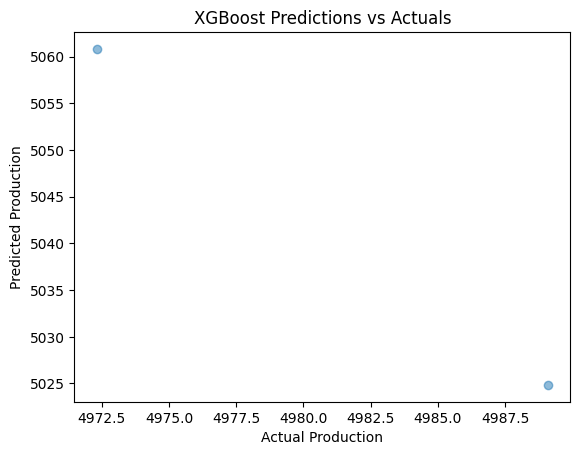

In [31]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("XGBoost Predictions vs Actuals")
plt.show()


## **Feature Importance Analysis**

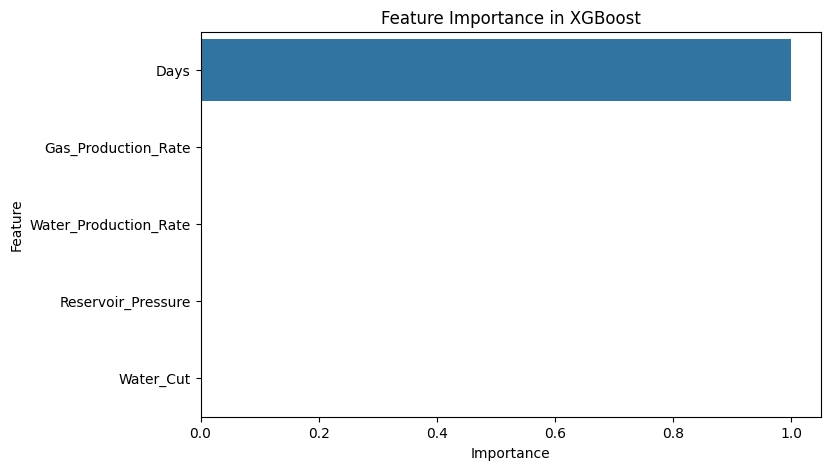

In [32]:
import pandas as pd
import seaborn as sns

# Get feature importance
feature_importance = pd.DataFrame({"Feature": X_train.columns, "Importance": best_xgb.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance in XGBoost")
plt.show()


## **Make Future Predictions**

In [35]:
import pandas as pd

# Load new data
new_data = pd.read_csv("https://raw.githubusercontent.com/EnvyNerd/Project-File/refs/heads/main/Cell%20output%202.csv")  # Replace with actual file

# Ensure new data has the correct features
expected_features = X_train.columns  # Ensure columns match training data
missing_features = [col for col in expected_features if col not in new_data.columns]

if missing_features:
    print(f"⚠️ Warning: Missing features in new data: {missing_features}")
else:
    # Apply the same scaling as training data
    new_data_scaled = scaler.transform(new_data[expected_features])  # Use only the expected features

    # Predict production
    predictions = best_xgb.predict(new_data_scaled)

    # Save predictions
    new_data["Predicted_Production"] = predictions
    new_data.to_csv("predicted_production.csv", index=False)

    print("✅ Predictions saved successfully!")


✅ Predictions saved successfully!


## **Validate Predictions (Error Analysis)**

In [39]:
# Load actual production data
actual_data = pd.read_csv("https://raw.githubusercontent.com/EnvyNerd/Project-File/refs/heads/main/Cell%20output%202.csv")  # Replace with correct file

# Merge with new_data based on a common column (e.g., 'Days')
new_data = new_data.merge(actual_data, on="Days", how="left")

# Now, 'Actual_Production' should be available
print(new_data.columns)


Index(['Days', 'Oil_Production_Rate_x', 'Gas_Production_Rate_x',
       'Water_Production_Rate_x', 'Reservoir_Pressure_x', 'Water_Cut_x',
       'Predicted_Production', 'Oil_Production_Rate_y',
       'Gas_Production_Rate_y', 'Water_Production_Rate_y',
       'Reservoir_Pressure_y', 'Water_Cut_y'],
      dtype='object')


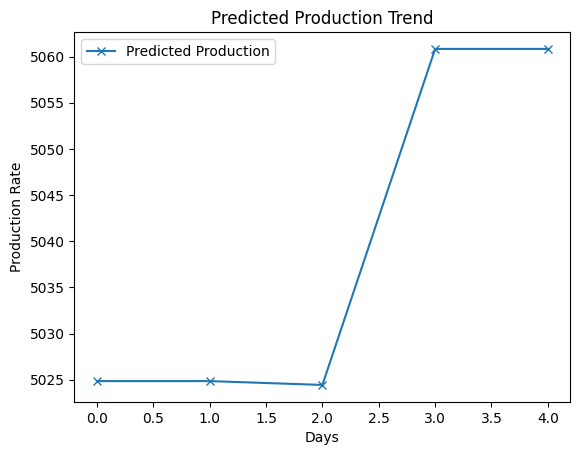

In [41]:
import matplotlib.pyplot as plt

plt.plot(new_data["Days"], new_data["Predicted_Production"], label="Predicted Production", marker="x")

plt.xlabel("Days")
plt.ylabel("Production Rate")
plt.legend()
plt.title("Predicted Production Trend")
plt.show()


## **Deploy the Model for Real-Time Predictions**

In [42]:
import joblib

# Save the trained model
joblib.dump(best_xgb, "xgboost_production_forecast.pkl")

# Reload the model for future predictions
loaded_model = joblib.load("xgboost_production_forecast.pkl")


## **Create a Simple Web App**

In [44]:
import streamlit as st
import pandas as pd
import joblib

# Load model
model = joblib.load("xgboost_production_forecast.pkl")

st.title("Reservoir Production Forecasting")

# Upload CSV file
uploaded_file = st.file_uploader("Upload your reservoir data (CSV)", type="csv")

if uploaded_file:
    new_data = pd.read_csv(uploaded_file)
    predictions = model.predict(new_data)
    new_data["Predicted_Production"] = predictions
    st.write(new_data)


2025-03-30 06:46:45.512 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-30 06:46:46.274 
  command:

    streamlit run c:\Program Files\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-30 06:46:46.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-30 06:46:46.280 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-30 06:46:46.288 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-30 06:46:46.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-30 06:46:46.314 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-30 06:46:46.323 Thread 'MainThread': 